##PURPOSE:To determine the choice of the viewer countrywise and focus on increasing the viewerbase for more profit

##importing libraries,dataset and performing various data cleaning,data conversion and duplicates removing tasks and showing null values in heatmap

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df=pd.read_csv('/content/netflix.csv')
df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [101]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [102]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
df.shape

(7789, 11)

In [103]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

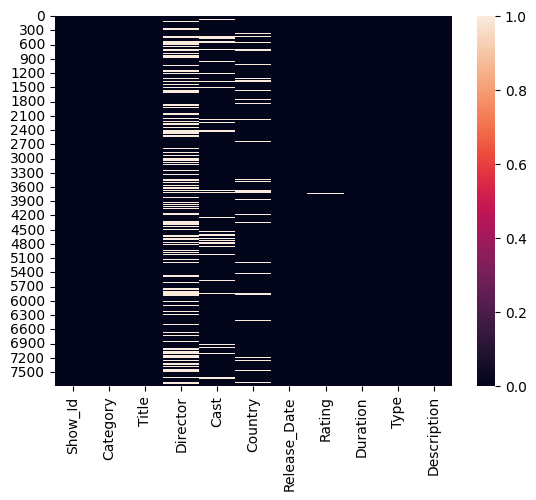

In [104]:
sns.heatmap(df.isnull())

In [105]:
df.drop(['Director'],axis=1,inplace=True)

In [106]:
df[df.duplicated()]

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,2019-04-05,TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,2020-09-04,TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [107]:
df.drop_duplicates(inplace=True)

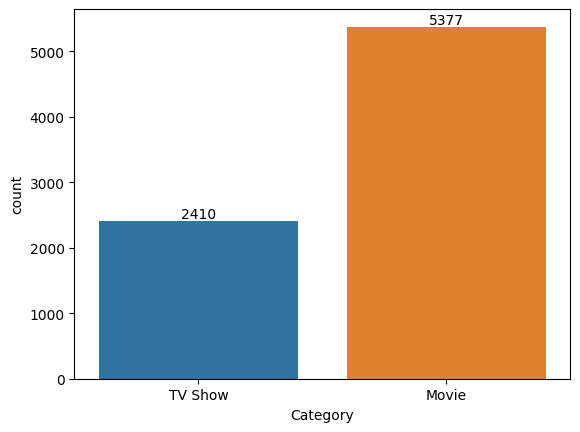

In [108]:
x0=sns.countplot(x='Category',data=df)
for bars in x0.containers:
  x0.bar_label(bars)

##New Columns formation

In [109]:
df['years']=df['Release_Date'].dt.year


In [110]:
df['month']=df['Release_Date'].dt.month

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7787 non-null   object        
 1   Category      7787 non-null   object        
 2   Title         7787 non-null   object        
 3   Cast          7069 non-null   object        
 4   Country       7280 non-null   object        
 5   Release_Date  7777 non-null   datetime64[ns]
 6   Rating        7780 non-null   object        
 7   Duration      7787 non-null   object        
 8   Type          7787 non-null   object        
 9   Description   7787 non-null   object        
 10  years         7777 non-null   float64       
 11  month         7777 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 790.9+ KB


##To determine maximum shows according to year and found that last 3 years means 2018,2019,2020 have maximum shows

In [112]:
yr_id=df.groupby(['years','Category'],as_index=False)['Show_Id'].count().sort_values(by='Show_Id',ascending=False).head(10)
yr_id

,years,Category,Show_Id
18,2019.0,Movie,1497
20,2020.0,Movie,1312
16,2018.0,Movie,1255
14,2017.0,Movie,864
21,2020.0,TV Show,697
19,2019.0,TV Show,656
17,2018.0,TV Show,430
15,2017.0,TV Show,361
12,2016.0,Movie,258
13,2016.0,TV Show,185


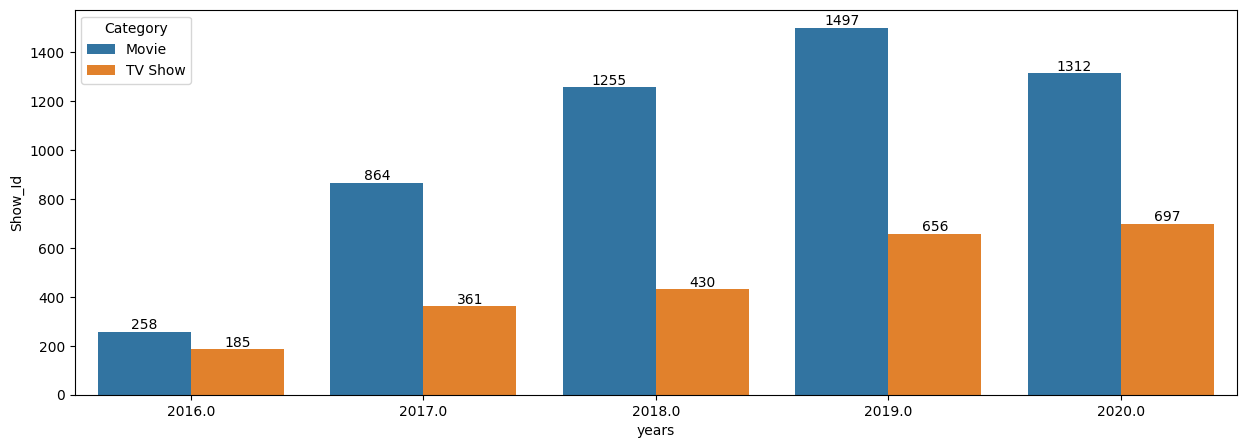

In [113]:
plt.figure(figsize=(15,5))
x1=sns.barplot(x='years',y='Show_Id',data=yr_id,hue='Category')
for bars in x1.containers:
  x1.bar_label(bars)

##To determine maximum viewer countrywise and it is found that Us,India and Uk are top 3 countries in viewers number in TV Show and in movie both


In [114]:
cnty_m=df.groupby(['Country'],as_index=False)['Show_Id'].count().sort_values(by='Show_Id',ascending=False).head(10)
cnty_m

,Country,Show_Id
549,United States,2555
229,India,923
462,United Kingdom,397
291,Japan,226
394,South Korea,183
51,Canada,177
403,Spain,134
147,France,115
137,Egypt,101
308,Mexico,100


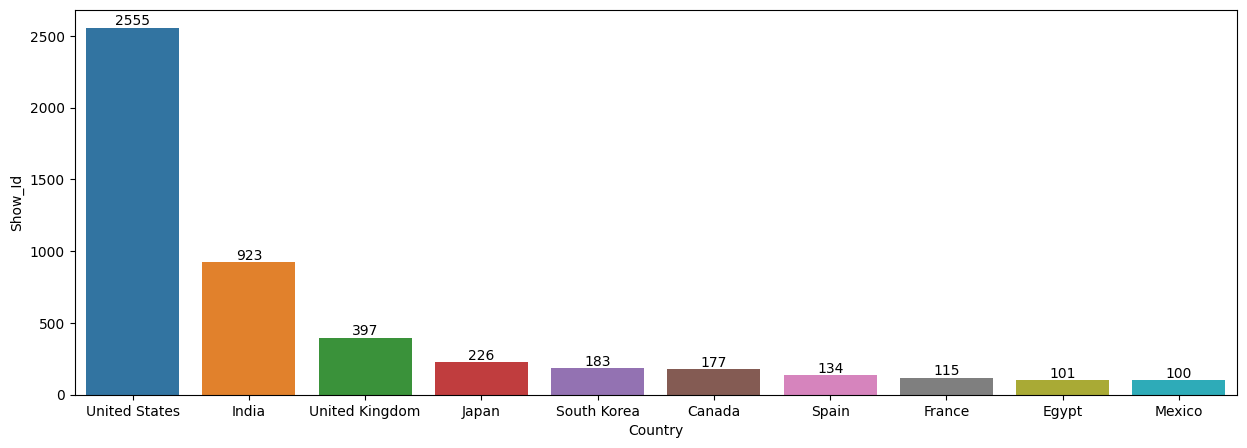

In [115]:
plt.figure(figsize=(15,5))
x2=sns.barplot(x='Country',y='Show_Id',data=cnty_m)
for bars in x2.containers:
  x2.bar_label(bars)

In [116]:
tv=df[df['Category']=='TV Show']
x5=tv['Country'].value_counts().head(10)
x5

United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Taiwan             68
Canada             59
France             46
Australia          46
Spain              45
Name: Country, dtype: int64

<Axes: >

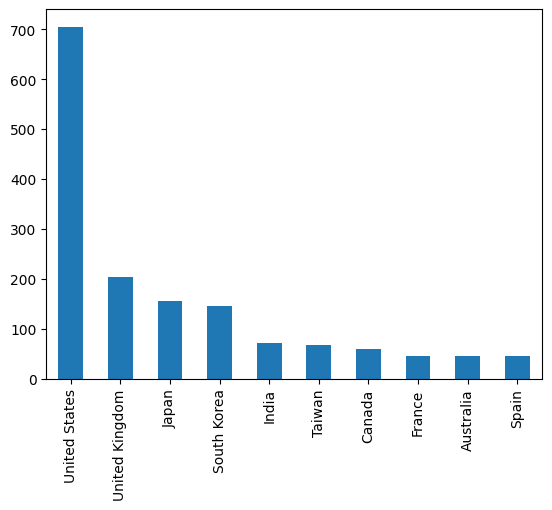

In [117]:
x5.plot(kind='bar')

In [118]:
mov=df[df['Category']=='Movie']
x6=mov['Country'].value_counts().head(10)
x6

United States     1850
India              852
United Kingdom     193
Canada             118
Spain               89
Egypt               89
Turkey              73
Philippines         70
France              69
Japan               69
Name: Country, dtype: int64

<Axes: >

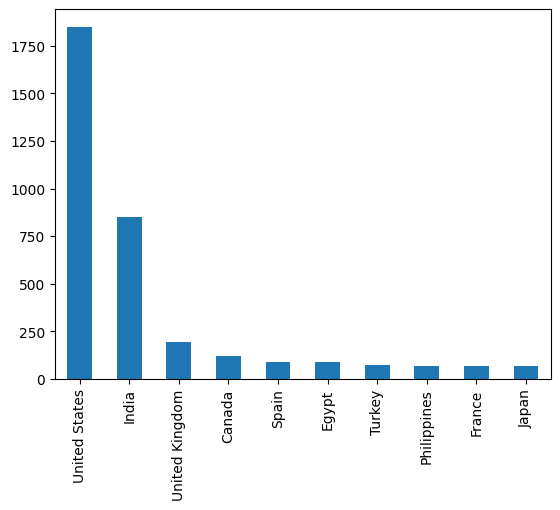

In [119]:
x6.plot(kind='bar')

In [120]:
df.fillna({'Cast':'unknown'},inplace=True)


##TO determine maximum film directed by and it is found that David Attenborough(18),Samuel West(10),Jeff Dunham(7) are top 3 directors


In [121]:
df['Cast'].value_counts().sort_values(ascending=False).head(10)

unknown                                                                                                                   718
David Attenborough                                                                                                         18
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Craig Sechler                                                                                                               6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
Kevin Hart                                                                                                                  6
Jim Gaffigan                                                                                                          

##To determine maximum show duration and it found that it is of 99 minutes

In [122]:

df['Duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [123]:
df[['time','unit']]=df['Duration'].str.split(' ',expand=True)

In [124]:
df['time'].max()

'99'

#**CONCLUSION:**To increase the profit,it is neccesary to make show as per the choice of viewers in US,India and UK and also determine the solution to increase the viewers in other countries by making shows as per their choice.